In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

combined_data= city_data.merge(ride_data, how = 'outer')
df = pd.DataFrame(combined_data[['city','date','fare','ride_id','driver_count','type']])
df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

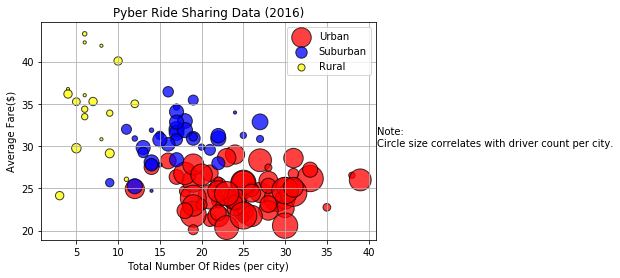

In [3]:
%matplotlib inline
# Obtain the x and y coordinates for each of the three city types

#Urban
urban_df = df.loc[df["type"] == "Urban", :]
city_index_df = urban_df.set_index("city")
type_count_df = urban_df.groupby("city").count()
type_mean_df = urban_df.groupby("city").mean()
x_axis = type_count_df["date"].values.tolist()
y_axis = type_mean_df["fare"].values.tolist()
driver_count_red = city_index_df.groupby(city_index_df.index).first()['driver_count'].values.tolist()
driver_count = [10*x for x in driver_count_red]
# Build the scatter plots for each city types
urban = plt.scatter(x_axis, y_axis, marker="o", facecolors = 'red', edgecolors="black",
            s=driver_count, alpha=0.75, label="Urban")

#Suburban
suburban_df = df.loc[df["type"] == "Suburban", :]
city_index_df = suburban_df.set_index("city")
type_count_df = suburban_df.groupby("city").count()
type_mean_df = suburban_df.groupby("city").mean()
x_axis = type_count_df["date"].values.tolist()
y_axis = type_mean_df["fare"].values.tolist()
driver_count_red = city_index_df.groupby(city_index_df.index).first()['driver_count'].values.tolist()
driver_count = [10*x for x in driver_count_red]
# Build the scatter plots for each city types
suburban = plt.scatter(x_axis, y_axis, marker="o", facecolors = 'blue', edgecolors="black",
            s=driver_count, alpha=0.75, label="Suburban")

#Rural
rural_df = df.loc[df["type"] == "Rural", :]
city_index_df = rural_df.set_index("city")
type_count_df = rural_df.groupby("city").count()
type_mean_df = rural_df.groupby("city").mean()
x_axis = type_count_df["date"].values.tolist()
y_axis = type_mean_df["fare"].values.tolist()
driver_count_red = city_index_df.groupby(city_index_df.index).first()['driver_count'].values.tolist()
driver_count = [10*x for x in driver_count_red]
# Build the scatter plots for each city types
rural = plt.scatter(x_axis, y_axis, marker="o", facecolors = 'yellow', edgecolors="black",
            s=driver_count, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number Of Rides (per city)')
plt.axis(aspect='image')
plt.grid()

# Create a legend
plt.legend(handles=[urban, suburban, rural], loc="best")

# Incorporate a text label regarding circle size
plt.text(41, 30, "Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Ride_Scatter.png")
plt.show()


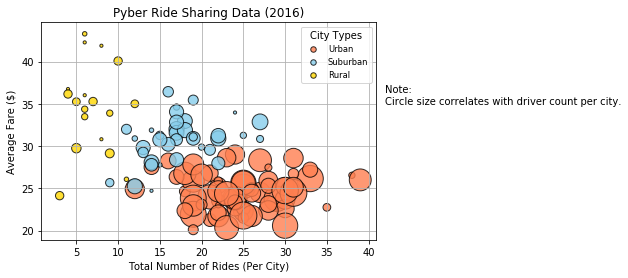

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

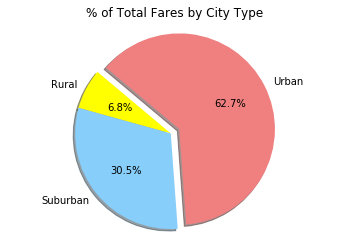

In [4]:
# Calculate Type Percents
city_df = df
city_index_df = city_df.set_index("city")
type_count_df = city_df.groupby('type').sum()
type_mean_df = city_df.groupby("city").mean()
chart_df = pd.DataFrame(type_count_df['fare'])
chart_df['Percentage'] = (chart_df['fare']*100/chart_df['fare'].sum())

sizes = chart_df["Percentage"].values.tolist()
labels = chart_df.index.tolist()
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Fares by City Type')


# Save Figure
plt.savefig("% of Total Fares by City Type.png")
plt.show()

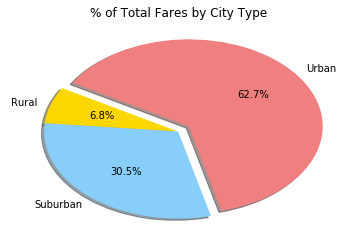

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

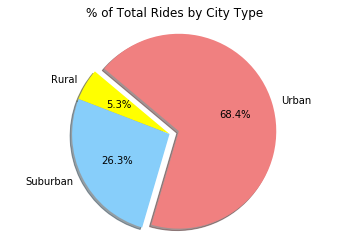

In [5]:
# Calculate Rides Percents
city_df = df
city_index_df = city_df.set_index("city")
type_count_df = city_df.groupby('type').count()
type_mean_df = city_df.groupby("city").mean()
chart_df = pd.DataFrame(type_count_df['fare'])
chart_df['Percentage'] = (chart_df['fare']/chart_df['fare'].sum())

sizes = chart_df["Percentage"].values.tolist()
labels = chart_df.index.tolist()
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Rides by City Type')


# Save Figure
plt.savefig("% of Total Rides by City Type.png")
plt.show()

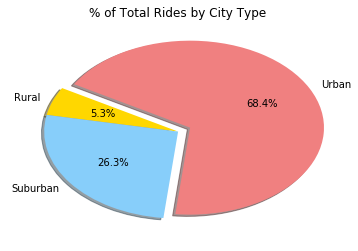

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

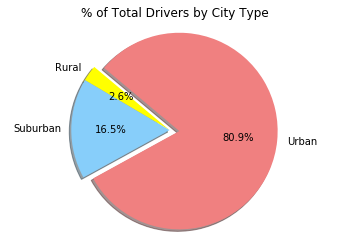

In [6]:
# Calculate Driver Percents
city_df = df
city_index_df = city_df.set_index("city")
driver_count_red = city_index_df.groupby(city_index_df.index).first()
type_count_df = driver_count_red.groupby("type").sum()
chart_df = pd.DataFrame(type_count_df['driver_count'])
chart_df['Percentage'] = (chart_df['driver_count']/chart_df['driver_count'].sum())

sizes = chart_df["Percentage"].values.tolist()
labels = chart_df.index.tolist()
colors = ["yellow", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')


# Save Figure
plt.savefig("% of Total Drivers by City Type.png")
plt.show()

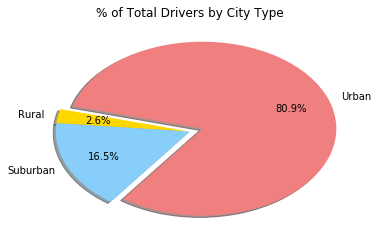

In [6]:
# Show Figure
plt.show()

------------------------------------------------------------

**TEST**

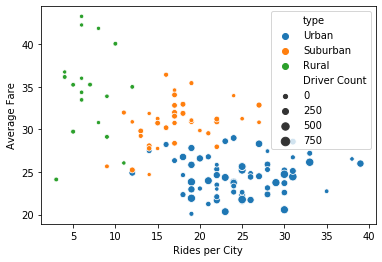

In [8]:
%matplotlib inline
# Obtain the x and y coordinates for each of the three city types
city_index_df = df.set_index("city")
type_count_df = df.groupby("city").count()
type_mean_df = df.groupby("city").mean()
driver_count_red = city_index_df.groupby(city_index_df.index).first()['driver_count'].values.tolist()

scatter_df = city_index_df.groupby(city_index_df.index).first()
scatter_df["Driver Count"] = [10*x for x in driver_count_red]
scatter_df["Rides per City"] = type_count_df["date"]
scatter_df["Average Fare"] = type_mean_df["fare"]

# Build the scatter plots for each city types
rider_plot = sns.scatterplot(x = 'Rides per City', y = "Average Fare", hue ='type', size = "Driver Count", data = scatter_df, legend = 'brief')
plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [ ]:
# Create dataframe for charts :
df_avgfare = pd.DataFrame({'AvgFare':df.groupby(["city","driver_count","type"]).fare.mean()}).reset_index("driver_count")
df_ridecount = pd.DataFrame({'RideCount':df.groupby(["city","driver_count","type"]).ride_id.count()}).reset_index("city")

# Merge Dataframes and create final with with stats:
df_chart =   pd.DataFrame.merge(df_avgfare, df_ridecount, on =["city","driver_count","type"] , how = 'inner').reset_index()
df_chart = df_chart.sort_values("type")
df_chart = df_chart.rename(columns={"type":"City Types"} )
df_chart['sizes'] = df_chart.driver_count * 10
df_chart.head()

count_chart = df_chart.plot(kind='scatter')
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")

g=sns.scatterplot(x='RideCount', y='AvgFare', hue ='City Types', size = 'sizes', data = df_chart, legend = 'brief' )

# Chart titles and labels
plt.ylabel('Average Fare($)')
plt.xlabel('Total Number Of Rides (per city)')
plt.title('Pyber Ride Sharing Data')
g.text( 41,20,"Note\nCircle size corelates with driver count per city\n")
g.legend(loc= 'upper right', bbox_to_anchor = (1.24,1.03))
plt.axis(aspect='image')
plt.savefig("../Images/Ride_Scatter.png", dpi=150, bbox_inches = 'tight')
plt.show()
plt.show()